In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report
import openpyxl


/Users/devanshk/Desktop/CSI5386-NLP/A2-VA/vaa/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Testing on D1

In [2]:
# Download latest version
path = kagglehub.dataset_download("doctri/microsoft-research-paraphrase-corpus")

test_dataset_path = path + "/msr_paraphrase_test.txt"

test_df = pd.read_csv(test_dataset_path, sep='\t', header=0, on_bad_lines='skip')

# Drop unnecessary columns
test_df = test_df[["Quality", "#1 String", "#2 String"]]

# Ensure no missing values
test_df.dropna(inplace=True)

test_df["Quality"] = test_df["Quality"].astype(int)

# Preprocess the sentences
def preprocess(text):
    return text.lower()

test_df['#1 String'] = test_df['#1 String'].apply(preprocess)
test_df['#2 String'] = test_df['#2 String'].apply(preprocess)

In [3]:
# Vectorize the sentences using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix1 = vectorizer.fit_transform(test_df['#1 String'])
tfidf_matrix2 = vectorizer.transform(test_df['#2 String'])

# Compute cosine similarities
cosine_similarities = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

# Set a threshold for classification (this can be tuned)
threshold = 0.5
predictions = (cosine_similarities >= threshold).astype(int)

# Convert predictions to a flat array
y_pred = predictions.diagonal()

# Extract true labels
y_true = test_df['Quality'].to_numpy()
output_df_A1_D1 = pd.DataFrame({
    "y_true": y_true,
    "y_pred": y_pred,
    "#1 String": test_df['#1 String'],
    "#2 String": test_df['#2 String']
})

# Save to an Excel file
output_file = "Results/output_df_A1_D1_predictions.xlsx"
output_df_A1_D1.to_excel(output_file, index=False)

<Figure size 640x480 with 0 Axes>

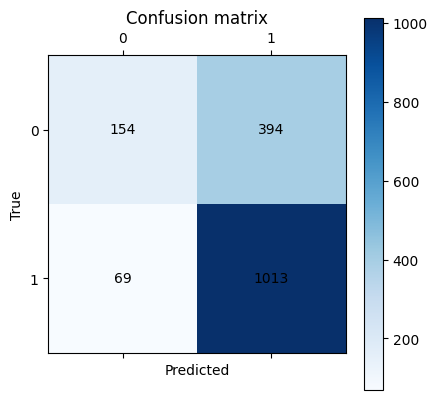

In [4]:

cm = confusion_matrix(y_true, y_pred)

plt.figure()
plt.matshow(cm, cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.show()

In [5]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.28      0.40       548
           1       0.72      0.94      0.81      1082

    accuracy                           0.72      1630
   macro avg       0.71      0.61      0.61      1630
weighted avg       0.71      0.72      0.67      1630



Testing on D2

In [6]:
test_df = pd.read_csv("VA_Assignment2/synthetic_dataset.csv", sep=',', header=0, on_bad_lines='skip', encoding='latin1')

# Drop unnecessary columns
test_df = test_df[["Quality", "#1 String", "#2 String"]]

# Ensure no missing values
test_df.dropna(inplace=True)

test_df["Quality"] = test_df["Quality"].astype(int)

# Preprocess the sentences
def preprocess(text):
    return text.lower()

test_df['#1 String'] = test_df['#1 String'].apply(preprocess)
test_df['#2 String'] = test_df['#2 String'].apply(preprocess)

FileNotFoundError: [Errno 2] No such file or directory: 'VA_Assignment2/synthetic_dataset.csv'

In [7]:
# Vectorize the sentences using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix1 = vectorizer.fit_transform(test_df['#1 String'])
tfidf_matrix2 = vectorizer.transform(test_df['#2 String'])

# Compute cosine similarities
cosine_similarities = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

# Set a threshold for classification (this can be tuned)
threshold = 0.5
predictions = (cosine_similarities >= threshold).astype(int)

# Convert predictions to a flat array
y_pred = predictions.diagonal()

# Extract true labels
y_true = test_df['Quality'].to_numpy()
# Create a new DataFrame for exporting
output_df_A1_D2 = pd.DataFrame({
    "y_true": y_true,
    "y_pred": y_pred,
    "#1 String": test_df['#1 String'],
    "#2 String": test_df['#2 String']
})

# Save to an Excel file
output_file = "Results/output_df_A1_D2_predictions.xlsx"
output_df_A1_D2.to_excel(output_file, index=False)

# Provide the file for download
output_file

'Results/output_df_A1_D2_predictions.xlsx'

<Figure size 640x480 with 0 Axes>

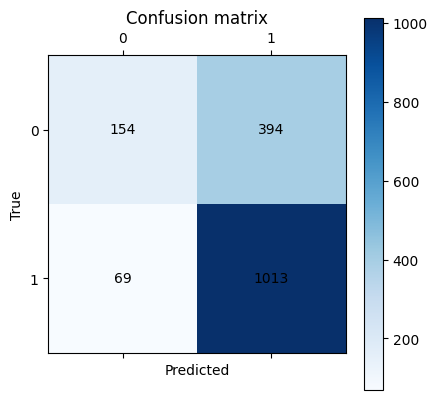

In [8]:
cm = confusion_matrix(y_true, y_pred)

plt.figure()
plt.matshow(cm, cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.show()

In [9]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.28      0.40       548
           1       0.72      0.94      0.81      1082

    accuracy                           0.72      1630
   macro avg       0.71      0.61      0.61      1630
weighted avg       0.71      0.72      0.67      1630

